In [1]:
# 导入相关的库
import numpy as np
import pandas as pd

# 数据勘查

In [2]:
# 读取数据 - 波士顿房价数据集
data = pd.read_csv(r'../Datasets/boston.csv')

波士顿房价数据集字段说明
* CRIM 房屋所在镇的犯罪率
* ZN 面积大于25000平方英尺住宅所占的比例
* INDUS 房屋所在镇非零售区域所占比例
* CHAS 房屋是否位于河边，如果位于河边，则值为1，否则值为0.
* NOX 一氧化氮的浓度
* RM 平均房间数量
* AGE 1940年前建成房屋所占的比例
* DIS 房屋距离波士顿五大就业中心的加权距离
* RAD 距离房屋最近的公路
* TAX 财产税额度
* PTRATIO 房屋所在镇师生比例
* B 计算公式： 1000 * （房屋所在镇非美籍人口所在比例 - 0.63） ** 2
* LSTAT 弱势群体人口所占比例
* MEDV 房屋的平均价格

In [3]:
# 查看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# 查看数据是否有重复值
data.duplicated().any()

False

In [5]:
# 前五条数据
# data.head()

# 最后五条数据
# data.tail()

# 随机5条数据
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
430,8.49213,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24.0,666.0,20.2,83.45,17.64,14.5
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
99,0.06860,0.0,2.89,0.0,0.445,7.416,62.5,3.4952,2.0,276.0,18.0,396.90,6.19,33.2
357,3.84970,0.0,18.10,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27,21.7
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6


# 算法实现

In [6]:
"""最小二乘法实现线性回归"""

class LinearRegression:
    
    # 根据提供的训练集，对模型进行训练
    # X：类数组类型，形状[样本数量，特征数量]，特征矩阵
    # y：类数组类型，形状[样本数量]
    def fit(self, X, y):
        # 通过创建X的拷贝，避免转换成矩阵失败
        X = np.asmatrix(X.copy())
        
        # y是一维结构（行向量或列向量），一维结构可以不用进行拷贝
        # 算法需要矩阵预算，使用reshape转换成二维结构
        y = np.asmatrix(y).reshape(-1, 1)
    
        # 使用最小二乘公式，求解各特征权重值
        self._w = (X.T * X).I * X.T * y

    # 根据样本数据进行预测
    def predict(self, X):
        # 将X转换为矩阵
        X = np.asmatrix(X.copy())
        
        # 计算结果
        result = X * self._w
        
        # 将矩阵转换成ndarray, 并使用ravel进行扁平化处理
        return np.array(result).ravel()

In [7]:
# 构建数据集
d = data.sample(len(data), random_state=0)

# 取前400条数据作为训练集
train_X = d.iloc[:400, :-1]  # 特征
train_y = d.iloc[:400, -1]  # 结果

# 取剩余条数的数据为测试集
test_X = d.iloc[400:, :-1]
test_y = d.iloc[400:, -1]

In [8]:
# 训练模型
lr = LinearRegression()
lr.fit(train_X, train_y)

# 查看各个特征的权重值
display(lr._w)

matrix([[-9.18342810e-02],
        [ 4.39241264e-02],
        [ 6.03666834e-03],
        [ 2.41855561e+00],
        [-3.33200936e+00],
        [ 5.58715607e+00],
        [-2.15854534e-03],
        [-8.56861175e-01],
        [ 2.27259981e-01],
        [-1.18811255e-02],
        [-2.52949647e-01],
        [ 1.50099506e-02],
        [-4.56877090e-01]])

In [9]:
# 使用训练好的模型进行预测
predict_y = lr.predict(test_X)

#查看预测结果
predict_y

array([32.42261152, 31.86156126,  9.51330759, 12.48133747, 24.07611064,
       35.60814742, 21.87646779, 21.84153557, 16.09224261, 28.4890082 ,
       41.27931758, 26.01023288, 40.9023699 , 24.65369946, 22.23194989,
       11.89275584, 14.53199976, 13.11832629, 21.07208434,  1.63473753,
       26.2692255 , 25.86938312, 40.15456584, 19.12623535, 24.3262408 ,
       35.13250993, 32.2589841 ,  8.89386625, 25.58850701, 43.81180397,
       19.52765456, 20.54277923, 24.57246882, 18.66045343,  6.18777975,
       20.39954995, 37.07675784, 17.10215026, 22.57044594, 14.31218642,
       22.99379236, 21.06321632, 20.67443731, 21.46832527, 33.63767218,
       22.37780827, 29.65090997, 34.74770006, 42.06223051, 17.38187885,
       16.53307771, 36.47833571, 19.91068267, 10.55759635, 16.48359441,
       23.49107944, 21.51026115, 18.98645669, 26.06769854, 11.42724381,
        7.66610465, 21.89186167,  8.08036631, 25.81339215,  3.39812313,
       27.0866603 , 32.58455701, 23.3843497 , 19.38854023, 18.08

# 模型评估

在回归任务（对连续值的预测）中，常见的评估指标（Metric）有：

- 平均绝对误差 MAE: Mean Absolute Error
- 均方误差 MSE: Mean Square Error
- 均方根误差 RMSE: Root Mean Square Error
- 平均绝对百分比误差 MAPE: Mean Absolute Percentage Error

常用的有MAE和MSE

### 平均绝对误差 MAE
MAE用来衡量预测值和真实值之间的平均绝对误差，MAE越小表示模型越好
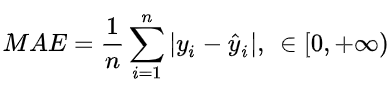

### 均方误差 MSE
即是线性回归的目标函数，也可以作为评估指标，越小越好
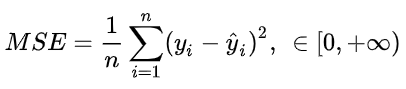

### 均方根误差 RMSE
RMSE是在MSE的基础上开根号而来，越小越好
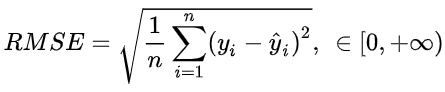

### 平均绝对百分比误差 MAPE
MAPE和MAE类似，是在MAE的基础上做了标准化处理，越小越好
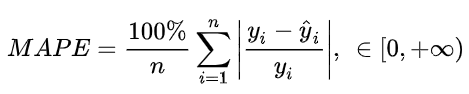

In [12]:
print('模型评估\n')
print('平均绝对误差MAE: ', np.mean(np.abs(test_y - predict_y)))
print('均方误差MSE: ', np.mean((test_y - predict_y) ** 2))
print('均方根误差RMSE: ', np.sqrt(np.mean((test_y - predict_y) ** 2)))
print('平均绝对百分比误差MAPE: ', np.mean(np.abs((test_y - predict_y) / test_y)))

模型评估

平均绝对误差MAE:  3.1895604553296986
均方误差MSE:  17.012679698466734
均方根误差RMSE:  4.124642978303302
平均绝对百分比误差MAPE:  0.16336902521404115


# 数据可视化

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

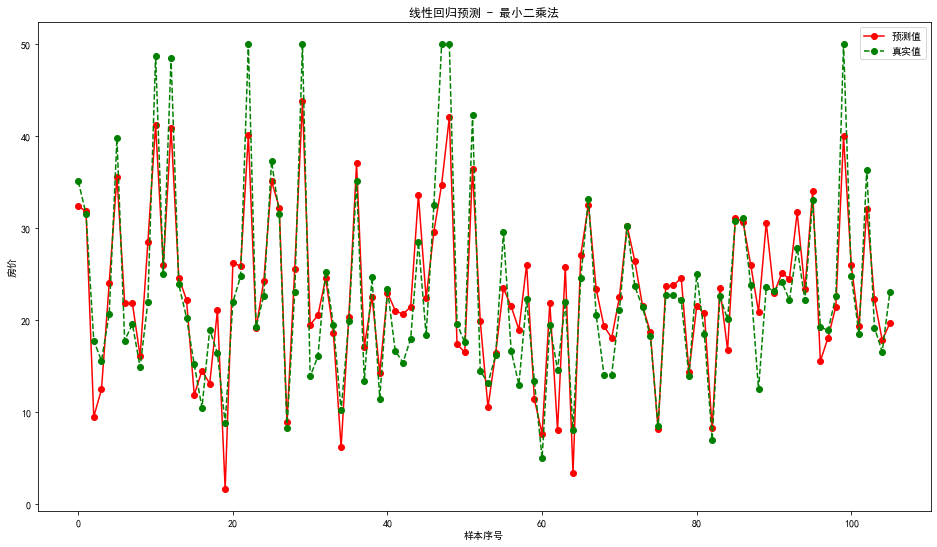

In [16]:
# 指定绘图大小
plt.figure(figsize=(16,9))

# 绘制预测值
plt.plot(predict_y, 'ro-', label='预测值')

# 绘制真实值
plt.plot(test_y.values, 'go--', label='真实值')

# 绘图
plt.title('线性回归预测 - 最小二乘法')
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.legend()
plt.show()